# Evaluation Project 4 : Global Power Plant

**Project Description**

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

**The database includes the following indicators:**

         country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
         country_long (text): longer form of the country designation
         name (text): name or title of the power plant, generally in Romanized form
         gppd_idnr (text): 10 or 12 character identifier for the power plant
         capacity_mw (number): electrical generating capacity in megawatts
         latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
         longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
         primary_fuel (text): energy source used in primary electricity generation or export
         other_fuel1 (text): energy source used in electricity generation or export
         other_fuel2 (text): energy source used in electricity generation or export
         other_fuel3 (text): energy source used in electricity generation or export
         commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
         owner (text): majority shareholder of the power plant, generally in Romanized form
         source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized formurl(text): web document corresponding to the source field
         geolocation_source (text): attribution for geolocation information
         wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
         year_of_capacity_data (number): year the capacity information was reported
         generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
         generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
         generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
         generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
         generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
         generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
         generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
         generation_data_source (text): attribution for the reported generation information
         estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
         estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014
         estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015
         estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016
         estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017
        'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
         estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014
         estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
         estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
         estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

**Fuel Type Aggregation**

We define the "Fuel Type" attribute of our database based on common fuel categories.

Prediction :

Make two prediction : 1) Primary Fuel 2) capacity_mw

In [2]:
# Importing Necessary Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression,LinearRegression, SGDRegressor,Ridge, Lasso
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score, classification_report, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the Dataset:

power_plant=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [4]:
# To Display top 5 rows:
power_plant.head()


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
# To display total number of rows and columns:
power_plant.shape

(907, 27)

**There are 907 rows and 27 column.**

In [6]:
# To display all the columns:
power_plant.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [8]:
# Checking datatypes of all the columns present:
power_plant.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

**There are float an object datatypes present in this given Dataset.**

In [9]:
# Finding the null values:
power_plant.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

**There are many columns where null values are present . There might be some important features too , so we cannot drop all the columns . We will treat these null values by filling and by dropping some irrelevent columns.**

In [10]:
# To get the brief information of data:
power_plant.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

**As we have to predict Target Variable , so let's start working on the Target Variable.**

In [11]:
# To find the unique values in primary_fuel label:
power_plant['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [12]:
# To find the unique values in capacity_mw label:
power_plant['capacity_mw'].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

In [13]:
# To find the number of unique values in Target variable:
power_plant['primary_fuel'].nunique()

8

In [14]:
power_plant['capacity_mw'].nunique()

361

In [15]:
# To find the total number of count in Target variable :
power_plant['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [16]:
power_plant['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

# Data Cleaning:

In [17]:
#Filling Null Values of "latitude" column in dataset by mean value
power_plant["latitude"].fillna(power_plant["latitude"].mean(), inplace=True)

In [18]:
#Filling Null Values of "longitude" column in dataset by mean value
power_plant["longitude"].fillna(power_plant["longitude"].mean(), inplace=True)

In [19]:
#checking all values of column 'other_fuel1'
power_plant["other_fuel1"].unique() 

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [20]:
#Droping column 'other_fuel1' as it have only one type of value that is 'Oil' and thus it have no relation with our Target column
power_plant=power_plant.drop(columns="other_fuel1", axis=1)

In [21]:
#Droping "other_fuel2 " column from dataset because most of the values (906) are missing and we can not take mean, mode etc of it as our total data is 907. So, we will drop this column.
power_plant=power_plant.drop(columns="other_fuel2", axis=1)

In [22]:
#Droping "other_fuel3" column from dataset because all values (907) are missing. So, we will drop this column.
power_plant=power_plant.drop(columns="other_fuel3", axis=1)

In [23]:
#checking all values of column 'commissioning_year'
power_plant["commissioning_year"].unique() 

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       1973., 2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [24]:
#Filling Null Values of "commissioning_year" column in dataset by mean value
power_plant["commissioning_year"].fillna(power_plant["commissioning_year"].mean(), inplace=True)

In [25]:
#Droping "owner" column from dataset because this column's data have no relation with our Target Column. 
power_plant=power_plant.drop(columns="owner", axis=1)

In [26]:
#Filling Null Values of "geolocation_source" column in dataset by mode value
power_plant["geolocation_source"].fillna(power_plant["geolocation_source"].mode()[0], inplace=True)

In [27]:
#Droping "wepp_id" column from dataset because all values (907) are missing. So, we will drop this column.
power_plant=power_plant.drop(columns="wepp_id", axis=1)

In [28]:
#Filling Null Values of "year_of_capacity_data" column in dataset by mean value
power_plant["year_of_capacity_data"].fillna(power_plant["year_of_capacity_data"].mean(), inplace=True)

In [29]:
#Droping "generation_gwh_2013" column from dataset because all values (907) are missing. So, we will drop this column.
power_plant=power_plant.drop(columns="generation_gwh_2013", axis=1)

In [30]:
#Filling Null Values of "generation_gwh_2014" column in dataset by mode value
power_plant["generation_gwh_2014"].fillna(power_plant["generation_gwh_2014"].mean(), inplace=True)


In [31]:
#Filling Null Values of "generation_gwh_2015" column in dataset by mode value
power_plant["generation_gwh_2015"].fillna(power_plant["generation_gwh_2015"].mean(), inplace=True)

In [32]:
#Filling Null Values of "generation_gwh_2016" column in dataset by mode value
power_plant["generation_gwh_2016"].fillna(power_plant["generation_gwh_2016"].mean(), inplace=True)

In [33]:
#Filling Null Values of "generation_gwh_2017" column in dataset by mode value
power_plant["generation_gwh_2017"].fillna(power_plant["generation_gwh_2017"].mean(), inplace=True)

In [34]:
#Filling Null Values of "generation_gwh_2018" column in dataset by mode value
power_plant["generation_gwh_2018"].fillna(power_plant["generation_gwh_2018"].mean(), inplace=True)

In [35]:
#Droping "generation_gwh_2019" column from dataset because all values (907) are missing. So, we will drop this column.
power_plant=power_plant.drop(columns="generation_gwh_2019", axis=1)

In [36]:
#Droping "generation_data_source" column from dataset.
power_plant=power_plant.drop(columns="generation_data_source", axis=1)

In [37]:
#Droping "estimated_generation_gwh" column from dataset because all values (907) are missing. So, we will drop this column.
power_plant=power_plant.drop(columns="estimated_generation_gwh", axis=1)

In [38]:
# To verify , if the null values are treated or not:
power_plant.isnull().sum()

country                  0
country_long             0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

**Great,There are no null values . We can go ahead.**

In [39]:
# To  display the Descriptive Statitics of Data;
power_plant.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,13.016360,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1997.091082,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2003.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [40]:
#Droping column 'year_of_capacity_data' as it have only one type of value that is '2019' and thus it have no relation with our Target column
power_plant=power_plant.drop(columns="year_of_capacity_data", axis=1)

In [41]:
#Droping column 'gppd_idnr' as it have no relation with our Target column
power_plant=power_plant.drop(columns="gppd_idnr", axis=1)

In [42]:
#Droping column 'country' as it have only one type of value that is 'IND' and thus it have no relation with our Target column
power_plant=power_plant.drop(columns="country", axis=1)

In [43]:
#Droping column 'country_long' as it have only one type of value that is 'India' and thus it have no relation with our Target column
power_plant=power_plant.drop(columns="country_long", axis=1)

In [44]:
#Droping column 'gppd_idnr' as it have no relation with our Target column
power_plant=power_plant.drop(columns="name", axis=1)

In [45]:
#Droping column 'source' as it have no relation with our Target column
power_plant=power_plant.drop(columns="source", axis=1)

In [46]:
#Droping column 'url' as it have no relation with our Target column
power_plant=power_plant.drop(columns="url", axis=1)

In [47]:
# checking total Rows and Columns after droping some irrelevent columns
power_plant.shape

(907, 11)

# Data Visualization:

In [48]:
# Visualizing Categorical columns using Count Plot:

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

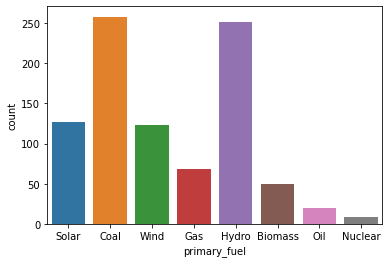

In [49]:
#Count Plot for "primary_fuel" column
print(power_plant["primary_fuel"].value_counts())

sns.countplot("primary_fuel",data=power_plant)

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

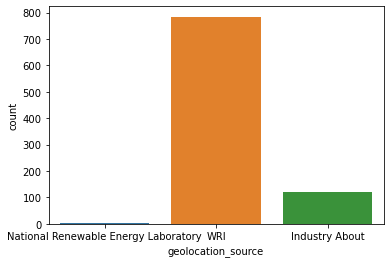

In [50]:
#Count Plot for "geolocation_source" column
print(power_plant["geolocation_source"].value_counts())

sns.countplot("geolocation_source",data=power_plant)

In [52]:
# Visualizing Continuous columns using "HistPlot"

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

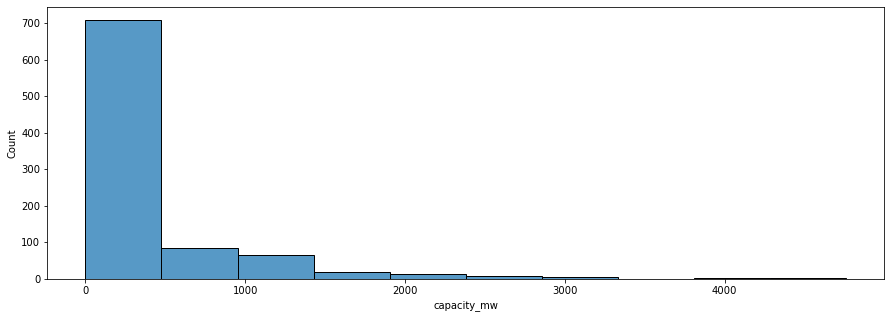

In [53]:
#Histplot for "capacity_mw" column
print(power_plant["capacity_mw"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='capacity_mw',data=power_plant,bins=10)

21.197918    46
19.000400     3
24.191700     3
31.268000     2
14.235200     2
             ..
22.755400     1
27.159800     1
17.297000     1
20.877200     1
9.934400      1
Name: latitude, Length: 837, dtype: int64


<AxesSubplot:xlabel='latitude', ylabel='Count'>

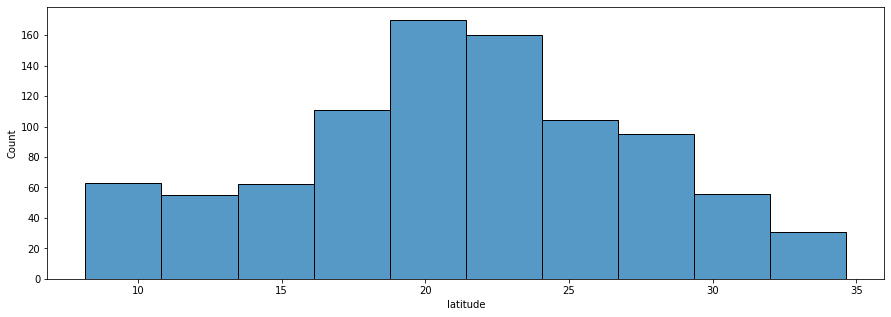

In [54]:
#Histplot for "latitude" column
print(power_plant["latitude"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='latitude',data=power_plant,bins=10)

77.464907    46
71.691700     4
75.898800     3
71.691800     3
72.898300     3
             ..
70.396100     1
74.239300     1
77.043500     1
73.825400     1
77.476800     1
Name: longitude, Length: 828, dtype: int64


<AxesSubplot:xlabel='longitude', ylabel='Count'>

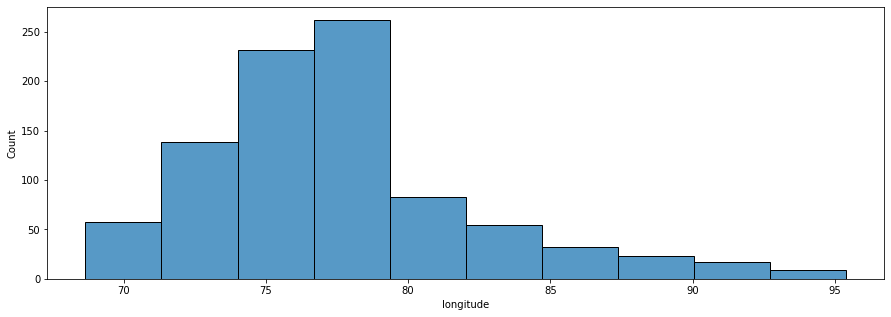

In [55]:
#Histplot for "longitude" column
print(power_plant["longitude"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='longitude',data=power_plant,bins=10)

1997.091082    380
2015.000000     28
2013.000000     25
2012.000000     23
2016.000000     19
              ... 
1946.000000      1
1956.000000      1
1937.000000      1
1949.000000      1
1953.000000      1
Name: commissioning_year, Length: 74, dtype: int64


<AxesSubplot:xlabel='commissioning_year', ylabel='Count'>

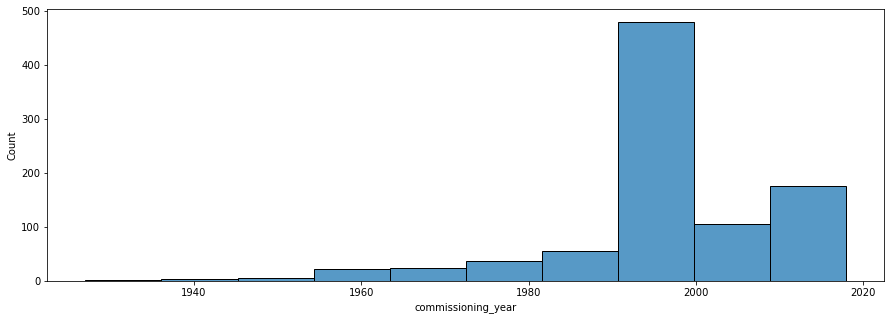

In [56]:
#Histplot for "commissioning_year" column
print(power_plant["commissioning_year"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='commissioning_year',data=power_plant,bins=10)

2431.82359    509
0.00000        28
359.13980       1
7368.39000      1
9983.01800      1
             ... 
1154.34200      1
451.05340       1
3239.14290      1
3155.00000      1
3194.35982      1
Name: generation_gwh_2014, Length: 372, dtype: int64


<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Count'>

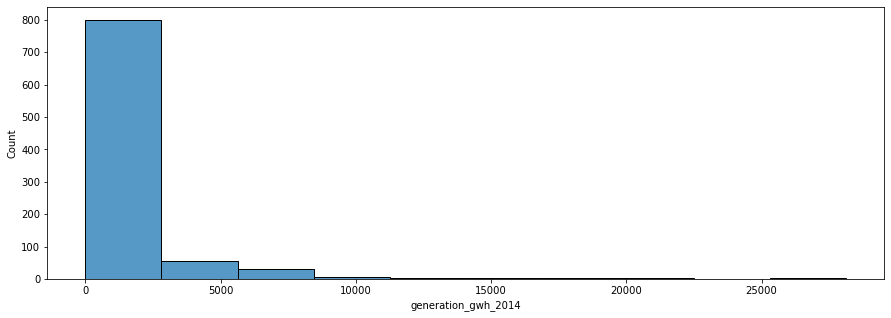

In [57]:
#Histplot for "generation_gwh_2014" column
print(power_plant["generation_gwh_2014"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='generation_gwh_2014',data=power_plant,bins=10)

2428.226946     485
0.000000         27
1497.798000       1
10422.690000      1
240.799900        1
               ... 
14192.000000      1
219.377600        1
288.460450        1
410.566850        1
0.994875          1
Name: generation_gwh_2015, Length: 397, dtype: int64


<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Count'>

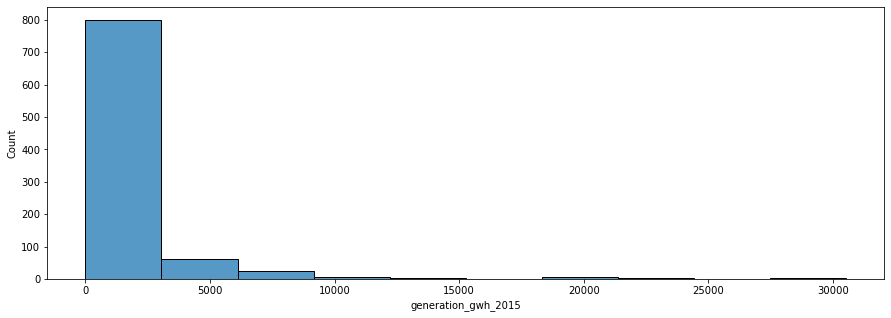

In [58]:
#Histplot for "generation_gwh_2015" column
print(power_plant["generation_gwh_2015"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='generation_gwh_2015',data=power_plant,bins=10)

2467.936859     473
0.000000         30
8470.570000       2
1511.000000       2
12.676300         1
               ... 
131.021600        1
6130.019928       1
5931.490000       1
14834.800000      1
233.596650        1
Name: generation_gwh_2016, Length: 404, dtype: int64


<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Count'>

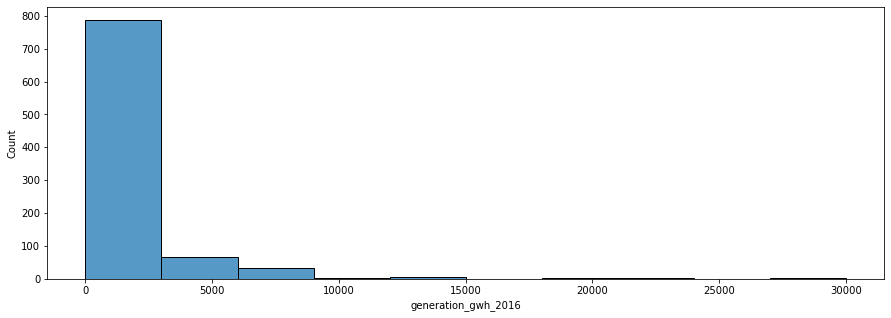

In [59]:
#Histplot for "generation_gwh_2016" column
print(power_plant["generation_gwh_2016"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='generation_gwh_2016',data=power_plant,bins=10)

2547.759305     467
0.000000         32
170.085300        2
272.739450        1
0.975100          1
               ... 
15177.000000      1
191.945450        1
307.375400        1
382.438200        1
865.400000        1
Name: generation_gwh_2017, Length: 409, dtype: int64


<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Count'>

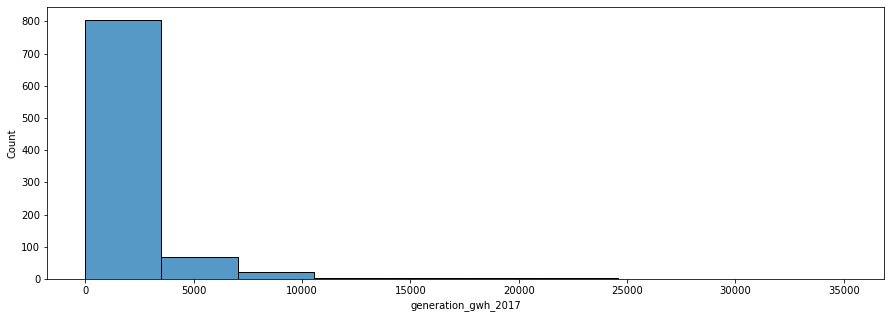

In [60]:
#Histplot for "generation_gwh_2017" column
print(power_plant["generation_gwh_2017"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='generation_gwh_2017',data=power_plant,bins=10)

2600.804099     459
0.000000         39
21.939750         1
17.213500         1
7200.400000       1
               ... 
7321.267900       1
6532.350000       1
15305.220000      1
373.970750        1
686.500000        1
Name: generation_gwh_2018, Length: 411, dtype: int64


<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Count'>

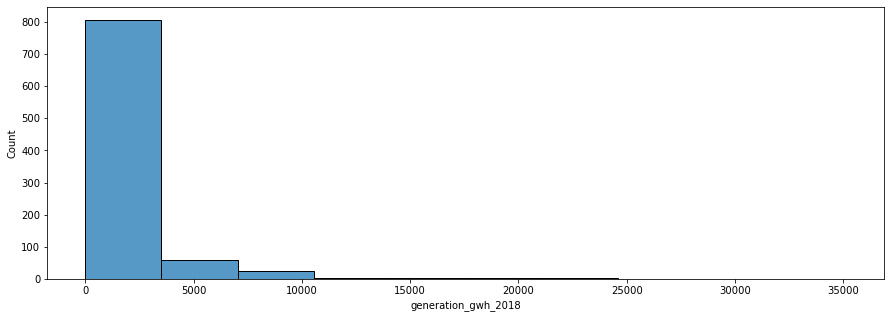

In [61]:
#Histplot for "generation_gwh_2018" column
print(power_plant["generation_gwh_2018"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='generation_gwh_2018',data=power_plant,bins=10)

In [62]:
# Bivariate Analysis:

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

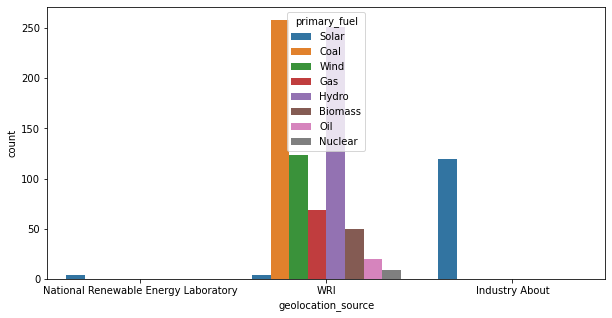

In [63]:
#Count Plot for comparision between "geolocation_source" column and "primary_fuel" column
plt.figure(figsize=(10,5))
sns.countplot("geolocation_source",data=power_plant, hue='primary_fuel')

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

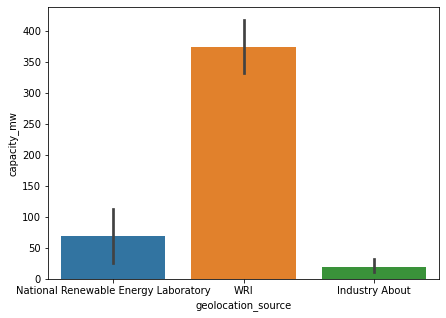

In [64]:
#Count Plot for comparision between "geolocation_source" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.barplot(x="geolocation_source",data=power_plant, y='capacity_mw')

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

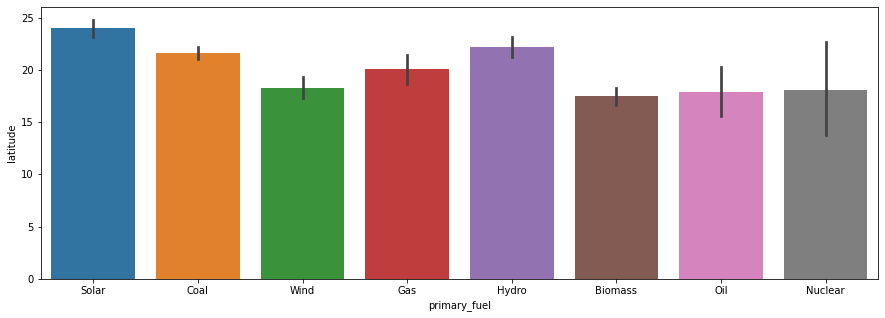

In [65]:
#hist Plot for comparision between "latitude" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="latitude",data=power_plant,x='primary_fuel')

<AxesSubplot:xlabel='primary_fuel', ylabel='longitude'>

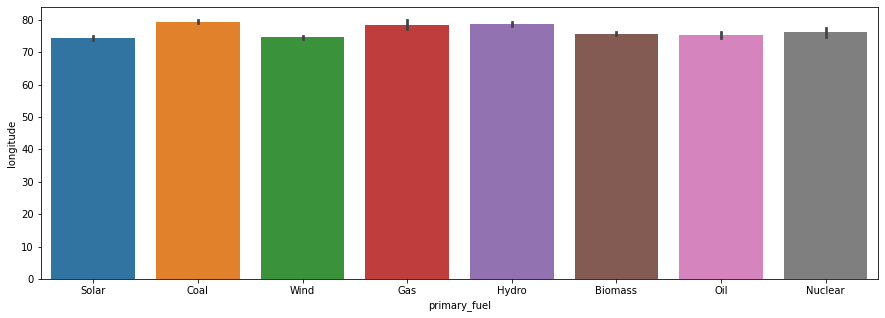

In [66]:
#hist Plot for comparision between "longitude" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="longitude",data=power_plant,x='primary_fuel')

<AxesSubplot:xlabel='primary_fuel', ylabel='longitude'>

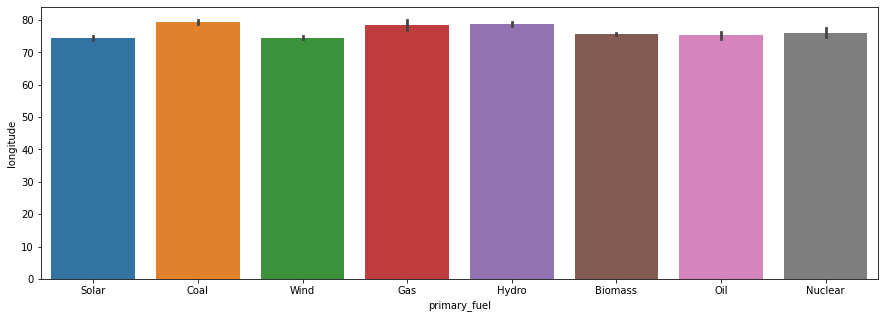

In [67]:
#Bar Plot for comparision between "longitude" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="longitude",data=power_plant,x='primary_fuel')

<AxesSubplot:xlabel='primary_fuel', ylabel='commissioning_year'>

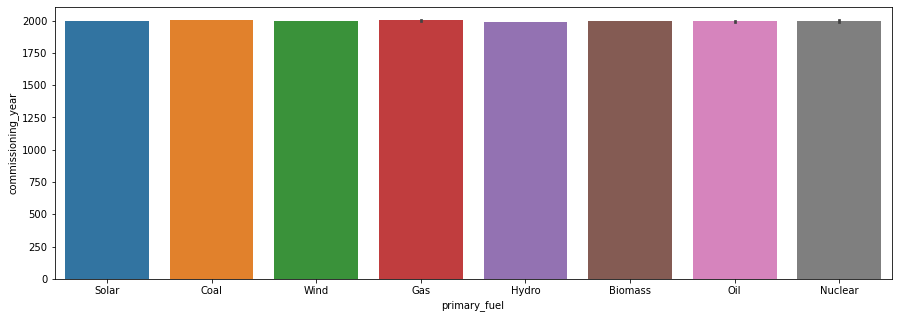

In [68]:
#Bar Plot for comparision between "commissioning_year" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="commissioning_year",data=power_plant,x='primary_fuel')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

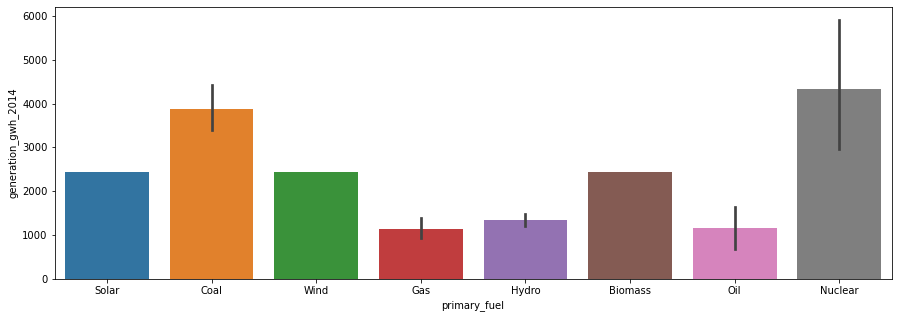

In [69]:
#Bar Plot for comparision between "generation_gwh_2014" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2014",data=power_plant,x='primary_fuel')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

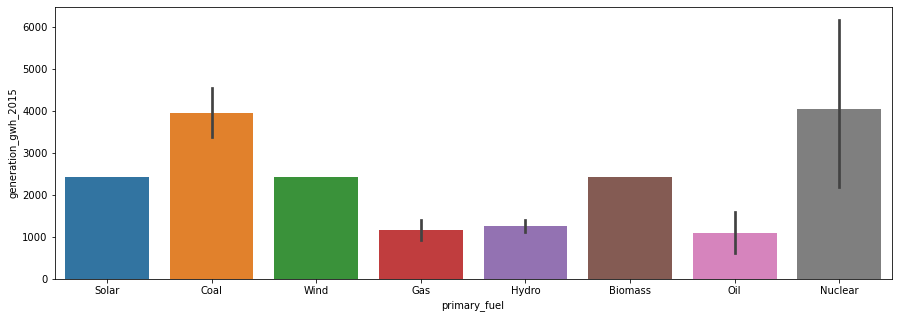

In [70]:
#Bar Plot for comparision between "generation_gwh_2015" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2015",data=power_plant,x='primary_fuel')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

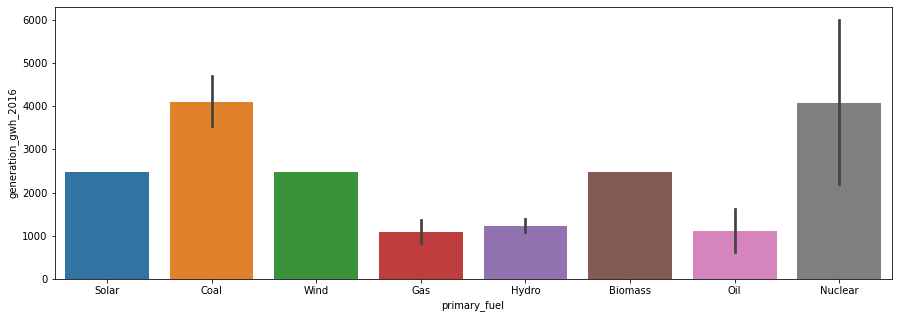

In [71]:
#Bar Plot for comparision between "generation_gwh_2016" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2016",data=power_plant,x='primary_fuel')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

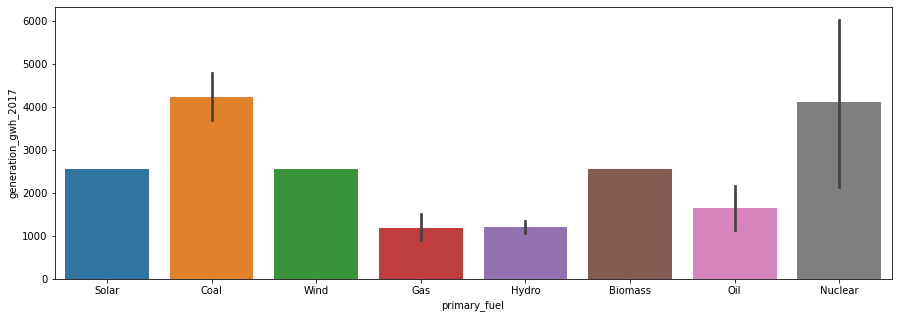

In [72]:
#Bar Plot for comparision between "generation_gwh_2017" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2017",data=power_plant,x='primary_fuel')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

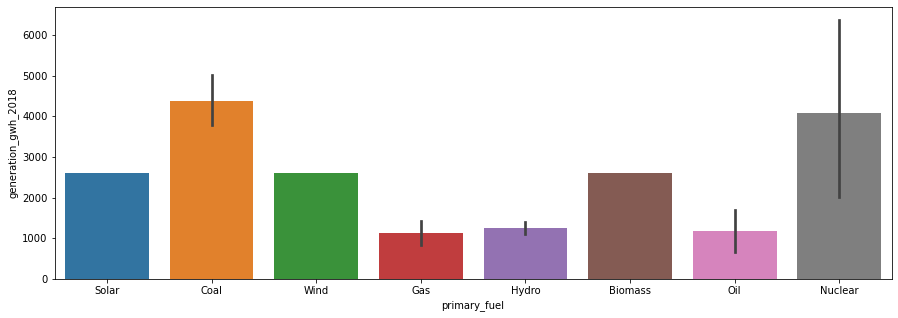

In [73]:
#Bar Plot for comparision between "generation_gwh_2018" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2018",data=power_plant,x='primary_fuel')

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

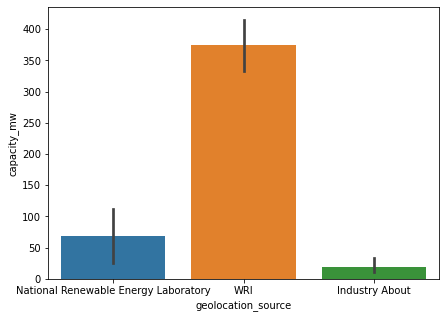

In [74]:
#Bar Plot for comparision between "geolocation_source" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.barplot(x="geolocation_source",data=power_plant, y='capacity_mw')

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

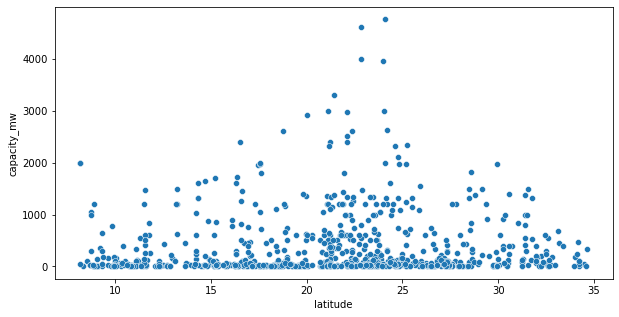

In [75]:
#scatterplot for comparision between "latitude" column and "capacity_mw" column
plt.figure(figsize=(10,5))
sns.scatterplot(x="latitude",data=power_plant, y='capacity_mw')

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

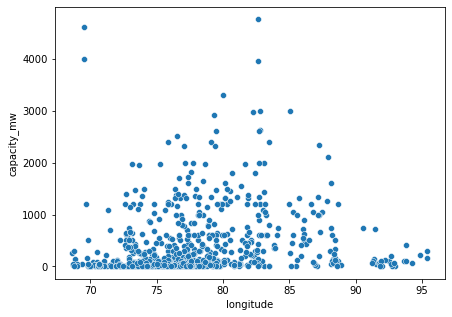

In [76]:
#scatterplot for comparision between "longitude" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.scatterplot(x="longitude",data=power_plant, y='capacity_mw')

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='capacity_mw'>

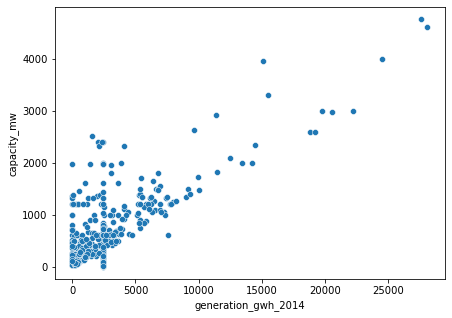

In [77]:
#scatterplot for comparision between "generation_gwh_2014" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.scatterplot(x="generation_gwh_2014",data=power_plant, y='capacity_mw')

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='capacity_mw'>

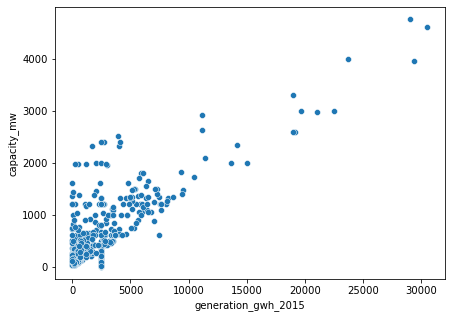

In [78]:
#scatterplot for comparision between "generation_gwh_2015" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.scatterplot(x="generation_gwh_2015",data=power_plant, y='capacity_mw')

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='capacity_mw'>

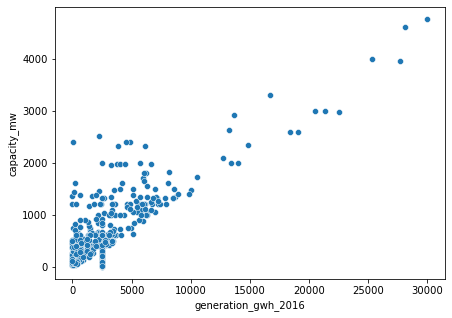

In [79]:
#scatterplot for comparision between "generation_gwh_2016" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.scatterplot(x="generation_gwh_2016",data=power_plant, y='capacity_mw')

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

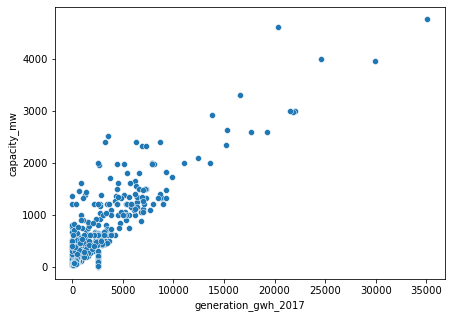

In [80]:
#scatterplot for comparision between "generation_gwh_2017" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.scatterplot(x="generation_gwh_2017",data=power_plant, y='capacity_mw')

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='capacity_mw'>

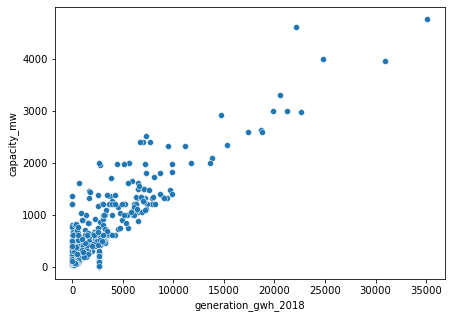

In [81]:
#scatterplot for comparision between "generation_gwh_2018" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.scatterplot(x="generation_gwh_2018",data=power_plant, y='capacity_mw')

In [82]:
# Multivariate Analysis:

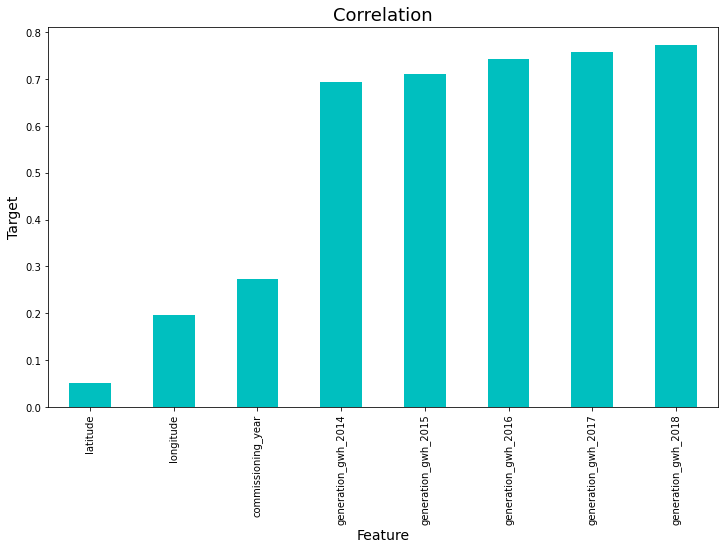

In [83]:
plt.figure(figsize=(12,7))
power_plant.corr()['capacity_mw'].sort_values(ascending=True).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

# Correlation:

In [84]:
power_plant.corr()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,0.274292,0.694350,0.711190,0.742221,0.757585,0.773456
latitude,0.050984,1.000000,0.036362,0.102069,0.044321,0.036398,0.031256,0.031212,0.031326
longitude,0.195882,0.036362,1.000000,0.092331,0.011472,0.018818,0.039209,0.039675,0.037780
commissioning_year,0.274292,0.102069,0.092331,1.000000,0.133051,0.147338,0.170644,0.170863,0.174377
generation_gwh_2014,0.694350,0.044321,0.011472,0.133051,1.000000,0.953594,0.925874,0.891687,0.884956
generation_gwh_2015,0.711190,0.036398,0.018818,0.147338,0.953594,1.000000,0.968888,0.928242,0.923461
generation_gwh_2016,0.742221,0.031256,0.039209,0.170644,0.925874,0.968888,1.000000,0.964649,0.957159
generation_gwh_2017,0.757585,0.031212,0.039675,0.170863,0.891687,0.928242,0.964649,1.000000,0.982689
generation_gwh_2018,0.773456,0.031326,0.037780,0.174377,0.884956,0.923461,0.957159,0.982689,1.000000


In [85]:
power_plant.corr()["capacity_mw"].sort_values()

latitude               0.050984
longitude              0.195882
commissioning_year     0.274292
generation_gwh_2014    0.694350
generation_gwh_2015    0.711190
generation_gwh_2016    0.742221
generation_gwh_2017    0.757585
generation_gwh_2018    0.773456
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

**We can observe least correlation is with column "latitude" and strong correlation is with column "generation_gwh_2018".**
**All columns are positively correlated with target column "capacity_mw".**

In [86]:
# Visualizing Correlation:

<AxesSubplot:>

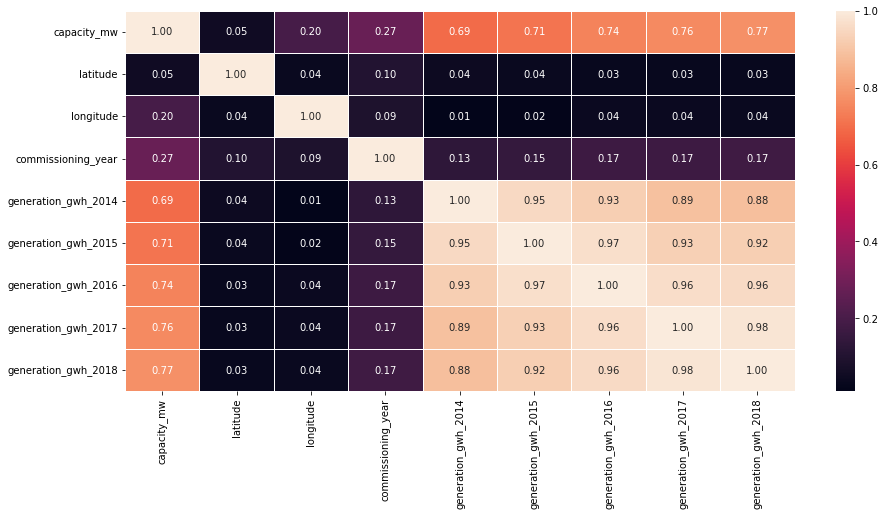

In [87]:
plt.figure(figsize=(15,7))
sns.heatmap(power_plant.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')

**Minimum Correlation: latitude**

**Maximum Correlation: generation_gwh_2018**

# Label Encoding

**As we have some object datatype , but model does not understand categorical values. So we need to convert object datatype into numeric using "Label Encoding".**

In [88]:
from sklearn.preprocessing import LabelEncoder

In [90]:
encoder = LabelEncoder()
for i in power_plant.columns:
    if power_plant[i].dtypes=="object":
        power_plant[i]=encoder.fit_transform(power_plant[i].values.reshape(-1,1))

In [91]:
# To verify , if the datatypes converted to float or not:
power_plant.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
commissioning_year     float64
geolocation_source       int32
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

# Outliers Detection:

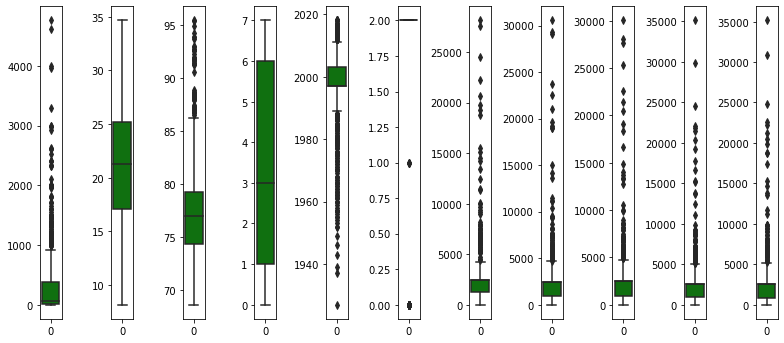

In [92]:
columns=power_plant.columns.values
ncol=11
nrows=7
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(columns)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=power_plant[columns[i]],color='green',orient='v')
    plt.tight_layout()

**Observations:**

 We observed that the Outliers are present in columns: 'capacity_mw', 'longitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018'.

In [94]:
# Removing Outliers using Z score method for primary_fuel:

In [95]:
outliers = power_plant[[ 'capacity_mw', 'longitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']]

z=np.abs(zscore(outliers))

# Creating new dataframe for regression
global_plant = power_plant[(z<3).all(axis=1)]
global_plant.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.000000,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.000000,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.000000,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [96]:
z.head()

,capacity_mw,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.548908,0.878280,1.069162e+00,1.083349,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
1,0.386977,0.593788,1.747794e-14,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
2,0.486679,1.682394,1.747794e-14,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
3,0.324240,2.889052,5.310801e-01,0.394241,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01
4,2.498942,1.027976,1.376637e+00,0.394241,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00


In [97]:
global_plant.shape

(849, 11)

In [98]:
# To find the no. of dropped rows:
power_plant.shape[0]-global_plant.shape[0]

58

In [99]:
# To find the data loss:
loss=(907-849)/907*100
print(loss,"%")

6.39470782800441 %


In [100]:
# Removing outliers using Z score method for capacity_mw:

In [101]:
outliers_ = power_plant[[  'longitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']]

z1=np.abs(zscore(outliers_))

# Creating new dataframe for classification
global_power = power_plant[(z1<3).all(axis=1)]
global_power.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.000000,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.000000,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.000000,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [102]:
z1.head()

,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.878280,1.069162e+00,1.083349,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
1,0.593788,1.747794e-14,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
2,1.682394,1.747794e-14,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
3,2.889052,5.310801e-01,0.394241,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01
4,1.027976,1.376637e+00,0.394241,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00


In [103]:
global_power.shape

(855, 11)

In [105]:
# To find the no. of rows dropped
power_plant.shape[0]-global_power.shape[0]

52

In [106]:
# To find the data loss:
loss__=(907-849)/907*100
print(loss__,"%")

6.39470782800441 %


In [107]:
# Checking for skewness:

In [108]:
global_plant.skew()

capacity_mw            1.979914
latitude              -0.109823
longitude              0.921980
primary_fuel           0.408694
commissioning_year    -0.845654
geolocation_source    -2.062603
generation_gwh_2014    1.526648
generation_gwh_2015    1.389889
generation_gwh_2016    1.413144
generation_gwh_2017    1.278735
generation_gwh_2018    1.315481
dtype: float64

In [109]:
global_power.skew()

capacity_mw            2.163488
latitude              -0.110936
longitude              0.917381
primary_fuel           0.420074
commissioning_year    -0.836962
geolocation_source    -2.074380
generation_gwh_2014    1.525975
generation_gwh_2015    1.375828
generation_gwh_2016    1.389992
generation_gwh_2017    1.293269
generation_gwh_2018    1.421012
dtype: float64

In [110]:
# Removing skewness using yeo-johnson method for primary_fuel:


In [111]:
columns_=[ 'capacity_mw','longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

global_plant[columns_]=power_transform(global_plant[columns_],method='yeo-johnson')
global_plant[columns]

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.676571,1.164277,-0.928072,6,1.292854,-2.236076,0.327200,0.356092,0.359399,0.360086,0.375133
1,0.228490,0.595264,-0.509209,1,-0.181973,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133
2,-0.268904,0.122311,-2.363978,7,-0.181973,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133
3,0.400958,0.446997,2.442106,2,0.501339,0.409608,-1.046002,-0.731478,-0.683964,-0.905238,-0.925585
4,1.752129,0.131611,1.253969,1,1.795252,0.409608,0.665917,1.898269,1.935543,1.564919,2.122435
...,...,...,...,...,...,...,...,...,...,...,...
902,1.692530,-0.793140,0.219861,1,1.926982,0.409608,0.327200,-2.096477,-1.420156,-0.721222,-0.867297
903,-1.597223,-1.339555,0.409525,6,-0.181973,-2.447802,0.327200,0.356092,0.359399,0.360086,0.375133
904,-0.502886,-0.957619,-0.235273,7,-0.181973,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133
905,0.118754,0.526266,-0.768095,1,-0.181973,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133


In [112]:
# To verify if skewness reduced or not:
global_plant.skew()

capacity_mw            0.015527
latitude              -0.069694
longitude              0.000035
primary_fuel           0.408694
commissioning_year     0.031733
geolocation_source    -2.035892
generation_gwh_2014   -0.243975
generation_gwh_2015   -0.309166
generation_gwh_2016   -0.309194
generation_gwh_2017   -0.340677
generation_gwh_2018   -0.354764
dtype: float64

In [113]:
# Removing skewness using yeo-johnson method for capacity_mw:

col=[ 'longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']
global_power[col]=power_transform(global_power[col],method='yeo-johnson')
global_power[col]


,longitude,latitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.932921,1.167827,1.271916,-2.249375,0.325398,0.350764,0.353547,0.346830,0.356994
1,-0.513810,0.596640,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
2,-2.368066,0.122069,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
3,2.447853,0.447846,0.486435,0.407930,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602
4,1.253377,0.131399,1.770248,0.407930,0.665459,1.898972,1.923558,1.534388,2.046635
...,...,...,...,...,...,...,...,...,...
902,0.216288,-0.795932,1.900885,0.407930,0.325398,-2.098927,-1.419729,-0.723788,-0.861856
903,0.406355,-1.343416,-0.192081,-2.457754,0.325398,0.350764,0.353547,0.346830,0.356994
904,-0.239580,-0.960773,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
905,-0.772877,0.527395,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994


In [114]:
# To verify , if the skewness reduced or not:
global_power.skew()

capacity_mw            2.163488
latitude              -0.068504
longitude             -0.000494
primary_fuel           0.420074
commissioning_year     0.028796
geolocation_source    -2.047591
generation_gwh_2014   -0.241358
generation_gwh_2015   -0.309409
generation_gwh_2016   -0.311647
generation_gwh_2017   -0.330764
generation_gwh_2018   -0.328334
dtype: float64

**Now we can see that the data is almost normally distributed. But we can see that the feature variables are negatively skewed and it will inverse relationship between feature variables and target variables. So to remove this, we will use variance threshold method.**

# Data Preprocessing:

**Splitting the training and testing dataset:**

In [115]:
x=global_plant.drop("primary_fuel",axis=1)
y=global_plant["primary_fuel"]

In [116]:
x.head()

,capacity_mw,latitude,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.676571,1.164277,-0.928072,1.292854,-2.236076,0.327200,0.356092,0.359399,0.360086,0.375133
1,0.228490,0.595264,-0.509209,-0.181973,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133
2,-0.268904,0.122311,-2.363978,-0.181973,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133
3,0.400958,0.446997,2.442106,0.501339,0.409608,-1.046002,-0.731478,-0.683964,-0.905238,-0.925585
4,1.752129,0.131611,1.253969,1.795252,0.409608,0.665917,1.898269,1.935543,1.564919,2.122435


In [117]:
y.head()

0    6
1    1
2    7
3    2
4    1
Name: primary_fuel, dtype: int32

In [118]:
x.shape, y.shape

((849, 10), (849,))

In [119]:
y.value_counts()

1    235
3    221
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

**Here we observed that the data is not balanced , so we have to balance the data using Oversampling method.**

In [121]:
pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [122]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [124]:
Smote = SMOTE()
x, y = Smote.fit_resample(x,y)

In [125]:
y.value_counts()

6    235
1    235
7    235
2    235
3    235
0    235
5    235
4    235
Name: primary_fuel, dtype: int64

**Great , the data is balanced now.**

In [126]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [127]:
x.head()

,capacity_mw,latitude,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.743683,1.435260,-0.880128,1.706690,-2.462646,0.306700,0.351027,0.370229,0.336578,0.390524
1,0.213869,0.840244,-0.406542,-0.138468,0.372705,0.306700,0.351027,0.370229,0.336578,0.390524
2,-0.297229,0.345677,-2.503632,-0.138468,0.372705,0.306700,0.351027,0.370229,0.336578,0.390524
3,0.391090,0.685201,2.930356,0.716425,0.372705,-1.024485,-0.693235,-0.595995,-0.866028,-0.832469
4,1.779490,0.355403,1.586991,2.335241,0.372705,0.635053,1.831791,1.829843,1.481691,2.033415


In [128]:
# For target variable capacity mw:

In [129]:
x1=global_power.drop("capacity_mw",axis=1)
y1=global_power["capacity_mw"]

In [130]:
x1.head()

,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.167827,-0.932921,6,1.271916,-2.249375,0.325398,0.350764,0.353547,0.346830,0.356994
1,0.596640,-0.513810,1,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
2,0.122069,-2.368066,7,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
3,0.447846,2.447853,2,0.486435,0.407930,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602
4,0.131399,1.253377,1,1.770248,0.407930,0.665459,1.898972,1.923558,1.534388,2.046635


In [131]:
y1.head()

0       2.5
1      98.0
2      39.2
3     135.0
4    1800.0
Name: capacity_mw, dtype: float64

In [132]:
y1.value_counts()

5.00       37
10.00      21
15.00      20
600.00     20
1200.00    19
           ..
119.80      1
21.84       1
195.00      1
645.00      1
106.60      1
Name: capacity_mw, Length: 334, dtype: int64

In [133]:
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns = x1.columns)

In [134]:
x1.head()


,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.167827,-0.932921,1.179853,1.271916,-2.249375,0.325398,0.350764,0.353547,0.346830,0.356994
1,0.596640,-0.513810,-0.972887,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
2,0.122069,-2.368065,1.610401,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
3,0.447846,2.447853,-0.542339,0.486435,0.407930,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602
4,0.131399,1.253377,-0.972887,1.770248,0.407930,0.665459,1.898972,1.923558,1.534388,2.046635


In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier

In [138]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)

In [139]:
x.shape, y.shape

((1880, 10), (1880,))

In [140]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((1316, 10), (1316,), (564, 10), (564,))

**Logistic Regression:**

In [141]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_lr))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_lr))
print("classification_report: \n", classification_report(y_test,pred_lr))

accuracy_score:  0.6205673758865248
confusion_matrix: 
 [[51  0  0  0  0  0  0 19]
 [ 6 31  9  9 10  1  0  1]
 [ 1  1 33  9  3  3  0  9]
 [ 9  5 13 37  6  6  1  2]
 [ 0  4  0  0 67  0  0  0]
 [ 1  2  4  2  0 30  0 27]
 [ 0  0  0  0  1  0 74  0]
 [41  7  0  0  0  2  0 27]]
classification_report: 
               precision    recall  f1-score   support

           0       0.47      0.73      0.57        70
           1       0.62      0.46      0.53        67
           2       0.56      0.56      0.56        59
           3       0.65      0.47      0.54        79
           4       0.77      0.94      0.85        71
           5       0.71      0.45      0.56        66
           6       0.99      0.99      0.99        75
           7       0.32      0.35      0.33        77

    accuracy                           0.62       564
   macro avg       0.64      0.62      0.62       564
weighted avg       0.64      0.62      0.62       564



**Random Forest Classifier:**

In [142]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_rfc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_rfc))
print("classification_report: \n",classification_report(y_test,pred_rfc))

accuracy_score:  0.9237588652482269
confusion_matrix: 
 [[70  0  0  0  0  0  0  0]
 [ 3 46  6  4  5  1  0  2]
 [ 0  2 52  1  2  0  0  2]
 [ 0  3  2 70  3  0  0  1]
 [ 0  0  0  0 71  0  0  0]
 [ 0  0  0  0  0 65  0  1]
 [ 0  0  0  0  0  0 75  0]
 [ 2  3  0  0  0  0  0 72]]
classification_report: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        70
           1       0.85      0.69      0.76        67
           2       0.87      0.88      0.87        59
           3       0.93      0.89      0.91        79
           4       0.88      1.00      0.93        71
           5       0.98      0.98      0.98        66
           6       1.00      1.00      1.00        75
           7       0.92      0.94      0.93        77

    accuracy                           0.92       564
   macro avg       0.92      0.92      0.92       564
weighted avg       0.92      0.92      0.92       564



**Decision Tree Classifier:**

In [143]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))
print("classification_report: \n",classification_report(y_test,pred_dtc))

accuracy_score:  0.8829787234042553
confusion_matrix: 
 [[62  5  0  0  0  0  0  3]
 [ 3 44  8  8  2  1  1  0]
 [ 1  2 49  3  3  1  0  0]
 [ 2  2  7 63  2  1  0  2]
 [ 0  0  0  0 71  0  0  0]
 [ 0  1  1  0  0 63  0  1]
 [ 0  0  0  0  0  0 75  0]
 [ 2  3  0  0  1  0  0 71]]
classification_report: 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        70
           1       0.77      0.66      0.71        67
           2       0.75      0.83      0.79        59
           3       0.85      0.80      0.82        79
           4       0.90      1.00      0.95        71
           5       0.95      0.95      0.95        66
           6       0.99      1.00      0.99        75
           7       0.92      0.92      0.92        77

    accuracy                           0.88       564
   macro avg       0.88      0.88      0.88       564
weighted avg       0.88      0.88      0.88       564



**Support Vector Machine Classifier:**

In [144]:
svc = SVC(kernel='linear', gamma=3)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_svc))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_svc))
print("classification_report: \n", classification_report(y_test,pred_svc))

accuracy_score:  0.6932624113475178
confusion_matrix: 
 [[70  0  0  0  0  0  0  0]
 [ 7 41  7  3  9  0  0  0]
 [ 0  2 36  8  0  3  0 10]
 [10  4 14 43  4  3  0  1]
 [ 0  0  0  0 71  0  0  0]
 [ 4  3  0  0  0 36  0 23]
 [ 0  0  0  0  1  0 74  0]
 [48  9  0  0  0  0  0 20]]
classification_report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67        70
           1       0.69      0.61      0.65        67
           2       0.63      0.61      0.62        59
           3       0.80      0.54      0.65        79
           4       0.84      1.00      0.91        71
           5       0.86      0.55      0.67        66
           6       1.00      0.99      0.99        75
           7       0.37      0.26      0.31        77

    accuracy                           0.69       564
   macro avg       0.71      0.69      0.68       564
weighted avg       0.71      0.69      0.68       564



**KNN Classifier:**

In [145]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_knn))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_knn))
print("classification_report: \n",classification_report(y_test,pred_knn))

accuracy_score:  0.8563829787234043
confusion_matrix: 
 [[70  0  0  0  0  0  0  0]
 [ 3 38  8  5 10  0  0  3]
 [ 0  2 46  0  1  9  0  1]
 [ 2  5  9 57  1  0  0  5]
 [ 0  0  1  0 70  0  0  0]
 [ 2  2  0  0  0 60  0  2]
 [ 0  0  0  0  0  0 75  0]
 [ 6  3  0  0  0  1  0 67]]
classification_report: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.92        70
           1       0.76      0.57      0.65        67
           2       0.72      0.78      0.75        59
           3       0.92      0.72      0.81        79
           4       0.85      0.99      0.92        71
           5       0.86      0.91      0.88        66
           6       1.00      1.00      1.00        75
           7       0.86      0.87      0.86        77

    accuracy                           0.86       564
   macro avg       0.85      0.85      0.85       564
weighted avg       0.86      0.86      0.85       564



In [146]:
# Let's check cross validation score for all the models:

In [147]:
print('CV score for Logistic Regression: ',cross_val_score(lr,x,y,cv=5).mean())

CV score for Logistic Regression:  0.5904255319148936


In [149]:
print('CV score for Random forest Classifier: ',cross_val_score(rfc,x,y,cv=5).mean())

CV score for Random forest Classifier:  0.9005319148936168


In [150]:
print('CV score for Decision Tree Classifier: ',cross_val_score(dtc,x,y,cv=5).mean())

CV score for Decision Tree Classifier:  0.8654255319148936


In [151]:
print('CV score for Support Vector  Classifier: ',cross_val_score(svc,x,y,cv=5).mean())

CV score for Support Vector  Classifier:  0.6930851063829787


In [152]:
print('CV score for KNN Classifier: ',cross_val_score(knn,x,y,cv=5).mean())

CV score for KNN Classifier:  0.8558510638297872


**From the observation of accuracy and cross validation score and their difference we can predict that Random Forest Classifier is the best model.**

# Hyper parameter tuning:

In [153]:
from sklearn.metrics import precision_score, recall_score, make_scorer

In [154]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 42)

In [155]:
rfc=RandomForestClassifier(random_state=30)

In [156]:
grid_params = {
                'criterion':['gini','entropy'],
                'max_depth': [15,20,22],
                'n_estimators':[700,900,1000],
                'min_samples_leaf': [1]
                }

In [157]:
CV_rfc = GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)

In [158]:
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20, 22], 'min_samples_leaf': [1],
                         'n_estimators': [700, 900, 1000]})

In [159]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'n_estimators': 1000}

In [160]:
Power_Plant = RandomForestClassifier(random_state=50, max_features='auto', n_estimators= 100, max_depth=8, criterion='gini')
Power_Plant.fit(x_train, y_train)
pred = Power_Plant.predict(x_test)
acc=accuracy_score(y_test,pred)
print("accuracy score: ",acc*100)

accuracy score:  83.33333333333334


In [161]:
# calculating the scores 
score = cross_val_score(rfc,x,y,cv=10,scoring="accuracy").mean()
print("confusion_matrix: \n",confusion_matrix(y_test,pred))
print("classification_report: \n",classification_report(y_test,pred))

confusion_matrix: 
 [[59  0  0  0  0  0  0  1]
 [ 6 44  6  7 13  1  0  4]
 [ 1  8 39  1  2  4  0  2]
 [ 1  4 14 47  3  1  0  0]
 [ 0  0  0  0 83  0  0  0]
 [ 0  2  0  0  0 76  0  1]
 [ 0  0  0  0  0  0 68  1]
 [ 8  3  0  0  0  0  0 54]]
classification_report: 
               precision    recall  f1-score   support

           0       0.79      0.98      0.87        60
           1       0.72      0.54      0.62        81
           2       0.66      0.68      0.67        57
           3       0.85      0.67      0.75        70
           4       0.82      1.00      0.90        83
           5       0.93      0.96      0.94        79
           6       1.00      0.99      0.99        69
           7       0.86      0.83      0.84        65

    accuracy                           0.83       564
   macro avg       0.83      0.83      0.83       564
weighted avg       0.83      0.83      0.83       564



In [162]:
# Saving the model :

In [163]:
filename='Global_Power_Plant.pickle'
pickle.dump(CV_rfc,open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([2, 6, 5, 3, 4, 4, 0, 4, 7, 4, 3, 3, 1, 6, 0, 0, 2, 1, 2, 0, 1, 5,
       0, 5, 4, 6, 6, 1, 2, 4, 1, 6, 6, 5, 0, 3, 2, 2, 4, 2, 0, 0, 2, 1,
       0, 2, 5, 1, 5, 4, 5, 6, 2, 4, 5, 7, 4, 5, 4, 2, 5, 2, 7, 1, 4, 3,
       1, 1, 4, 7, 6, 3, 5, 6, 6, 4, 4, 5, 4, 6, 7, 6, 2, 2, 3, 3, 1, 4,
       2, 0, 6, 4, 5, 5, 3, 3, 1, 0, 2, 0, 7, 4, 6, 5, 4, 6, 5, 1, 3, 3,
       5, 5, 5, 1, 7, 7, 1, 2, 0, 1, 4, 7, 5, 3, 4, 2, 7, 5, 4, 3, 5, 1,
       0, 6, 7, 2, 3, 4, 1, 3, 7, 6, 1, 6, 5, 6, 1, 1, 7, 4, 0, 7, 6, 1,
       2, 7, 5, 0, 5, 6, 3, 2, 0, 4, 6, 5, 5, 2, 5, 3, 0, 5, 6, 6, 4, 3,
       7, 4, 2, 7, 4, 6, 4, 6, 0, 6, 0, 7, 0, 1, 4, 4, 2, 7, 3, 3, 1, 1,
       0, 1, 5, 4, 7, 5, 6, 3, 7, 1, 2, 7, 2, 0, 3, 1, 5, 0, 2, 5, 2, 0,
       3, 3, 4, 0, 5, 1, 1, 6, 5, 5, 5, 3, 0, 3, 5, 0, 7, 3, 7, 7, 5, 3,
       7, 7, 4, 6, 4, 3, 4, 6, 3, 4, 0, 5, 7, 4, 6, 1, 4, 3, 6, 5, 5, 3,
       5, 1, 1, 5, 4, 7, 3, 3, 4, 0, 7, 0, 4, 4, 0, 7, 2, 4, 7, 6, 7, 0,
       4, 0, 4, 6, 5, 0, 3, 5, 2, 0, 0, 7, 7, 6, 1,

In [164]:
a =np.array(y_test)
predicted=np.array(CV_rfc.predict(x_test))
Global_Power_Plant=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
Global_Power_Plant

,Orginal,Predicted
0,2,2
1,6,6
2,5,5
3,3,3
4,3,4
...,...,...
559,6,6
560,3,3
561,4,4
562,6,6


In [165]:
#  for Target column is "capacity_mw":

In [166]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=35)

In [167]:
x1.shape, y1.shape

((855, 10), (855,))

In [168]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((598, 10), (598,), (257, 10), (257,))

# Linear regression:

In [169]:
from sklearn.linear_model import LinearRegression

In [170]:
lr=LinearRegression()
lr.fit(x_train,y_train)
#prediction
pred_lr=lr.predict(x_test)

#checking R2 Score
print("R2 score: ", r2_score(y_test, pred_lr))
#checking Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_lr))
#checking Mean squared error
print("Mean squared error: ",mean_squared_error(y_test,pred_lr))
#checking Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score:  0.4235631829443154
Mean abs error:  254.31321227418962
Mean squared error:  125031.46893996737
Root Mean Squared Error:  353.5978915943467


# Random forest Regression Model:

In [171]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=28)
RFR.fit(x_train,y_train)
# prediction
pred_RFR=RFR.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_RFR))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_RFR))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_RFR))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 score:  0.8256430004841284
Mean abs error:  91.15630240775155
Mean squared error:  37818.735938458776
Root Mean Squared Error:  194.47039861752424


# KNN regressor:

In [172]:
# Checking R2 score for KNN Regressor
knn=KNeighborsRegressor(n_neighbors=9 )
knn.fit(x_train,y_train)
# prediction
pred_knn=knn.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_knn))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_knn))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_knn))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score:  0.7203943028339759
Mean abs error:  119.37926113272806
Mean squared error:  60647.602662191726
Root Mean Squared Error:  246.26733982034997


# Decision Tree Regressor:

In [173]:
# Checking R2 score for Decision Tree Regressor 
DTR= DecisionTreeRegressor(random_state=29)
DTR.fit(x_train,y_train)
# prediction
pred_DTR=DTR.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_DTR))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_DTR))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_DTR))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2 score:  0.6908551436411783
Mean abs error:  118.65344876783399
Mean squared error:  67054.76534828059
Root Mean Squared Error:  258.94934900146126


In [174]:
print('The CV score  for Linear_regression is :',cross_val_score(lr,x1,y1,cv=7).mean())

The CV score  for Linear_regression is : 0.36815504004738553


In [175]:
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x1,y1,cv=7).mean())

The CV  score for  the Random forest regressor is: 0.7793147744268438


In [176]:
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x1,y1,cv=7).mean())

The CV score  for  the KNN regressor is : 0.6966138052734522


In [177]:
print('The CV score  for  the DTR is :',cross_val_score(DTR,x1,y1,cv=7).mean())

The CV score  for  the DTR is : 0.5839862785853557


# Conclusion:

We got the accuracy score of 83% for the Target variabe primary_fuel and 77% for the Target Variable Capacity_mw using random forest algorithm . The accuracy score is recorded after using cross validation score , so there is no chance of overfitting and underfitting . So ,the model performance is quite satifying for predicting the results.